In [1]:
# Import necessary library 
import numpy as np  # Algebra
import pandas as pd # dataframe data 
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # Visualization

In [2]:
# load data into dataframe 
train_data = pd.read_csv('train.csv') 

In [3]:
# five first rows in the dataset
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#five last rows in the dataset
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
# Reading test data and load into dataframe
test_data = pd.read_csv('test.csv')

In [6]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
test_data.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


The significant difference between the test data and the train data is the survived feature(column) 
that exists in the train data and is not a part of the test data. 

# Data Explore

In [8]:
All_data = [train_data,test_data]

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are 891 rows in the 'train' dataset and 12 features. Seven features (PassengerId, Survived, Pclass, Age, SibSp,Fare) 
are numerical and the other is categorical. 
Also, there are missing values in the Age, Cabin, and Embarked features. 

<AxesSubplot:xlabel='Survived', ylabel='count'>

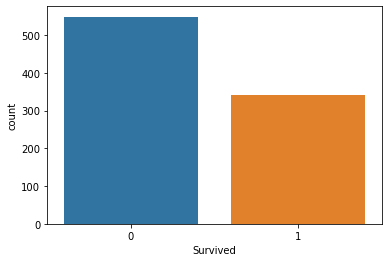

In [10]:
sns.countplot(data=train_data, x ='Survived')

The number of people that survived is really less than the number of people that sank.

In [11]:
train_data.groupby('Survived').count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


As mentioned before, the number of passengers that survived was 342 and the number of people that sank was 549. 

<AxesSubplot:xlabel='Pclass', ylabel='count'>

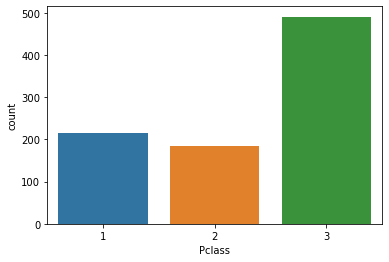

In [12]:
sns.countplot(data=train_data, x ='Pclass')

Most passengers are in class three, while the number of passengers in classes one and two is near to equal.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

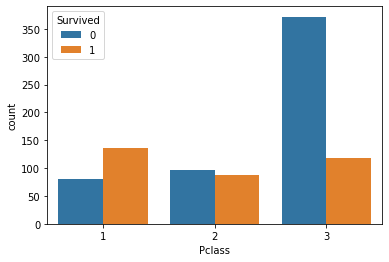

In [13]:
sns.countplot(data=train_data, x ='Pclass',hue='Survived')

<AxesSubplot:xlabel='Age', ylabel='Count'>

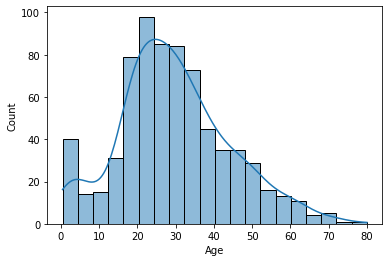

In [14]:
sns.histplot(data=train_data, x ='Age',kde=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

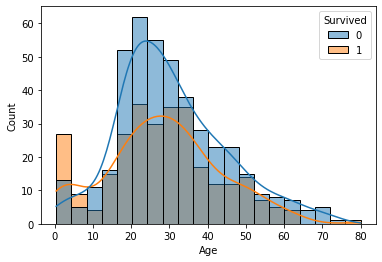

In [15]:
sns.histplot(data=train_data, x ='Age',kde=True,hue='Survived')

<AxesSubplot:xlabel='Sex', ylabel='count'>

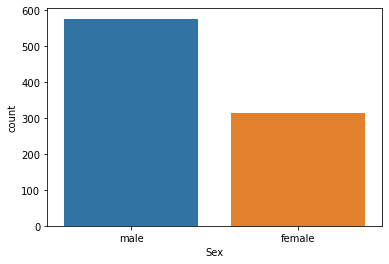

In [16]:
sns.countplot(data=train_data, x='Sex')

<AxesSubplot:xlabel='Sex', ylabel='count'>

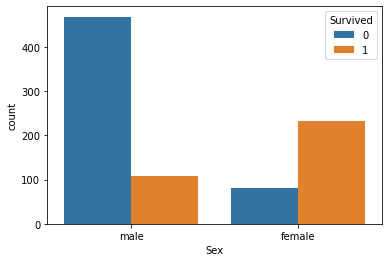

In [17]:
sns.countplot(data=train_data, x='Sex', hue='Survived')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

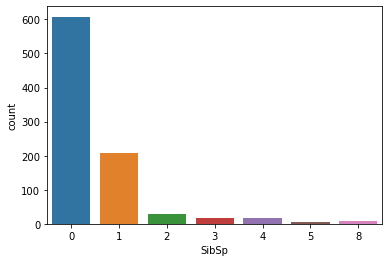

In [18]:
sns.countplot(data=train_data, x= 'SibSp')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

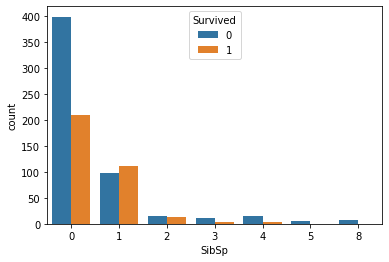

In [19]:
sns.countplot(data=train_data, x= 'SibSp',hue='Survived')

<AxesSubplot:xlabel='Parch', ylabel='count'>

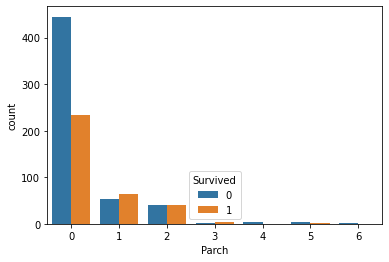

In [20]:
sns.countplot(data=train_data, x= 'Parch',hue='Survived')

<AxesSubplot:xlabel='Ticket', ylabel='count'>

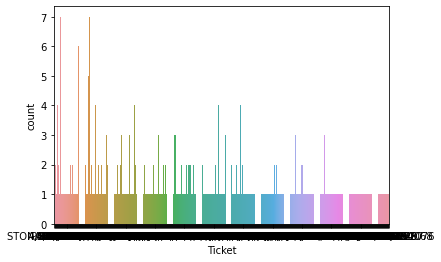

In [21]:
sns.countplot(data=train_data, x ='Ticket')

<AxesSubplot:xlabel='Fare', ylabel='Count'>

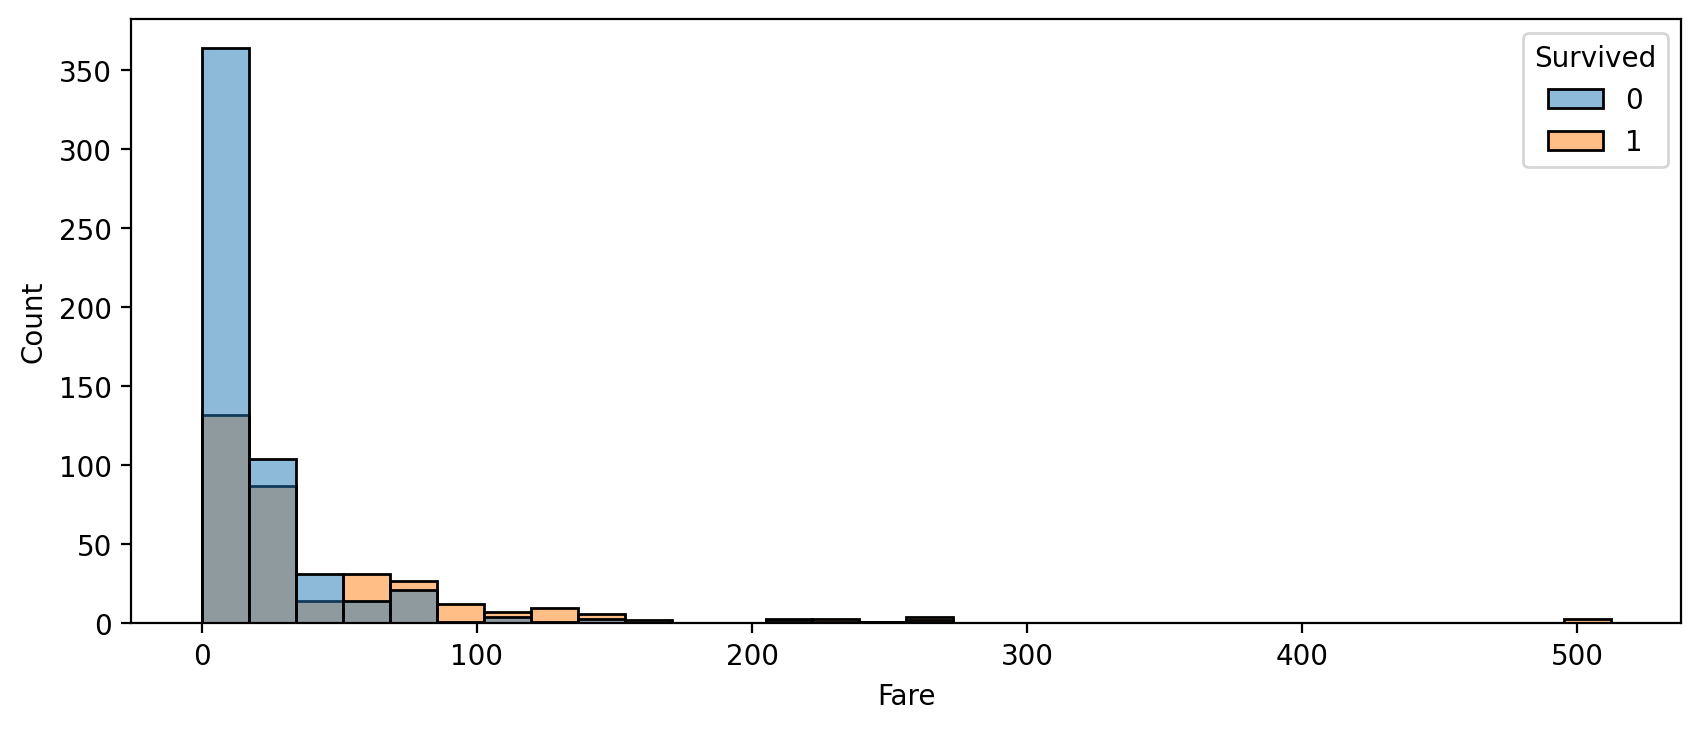

In [22]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=train_data, x='Fare',hue='Survived',bins=30)


In [24]:
train_data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

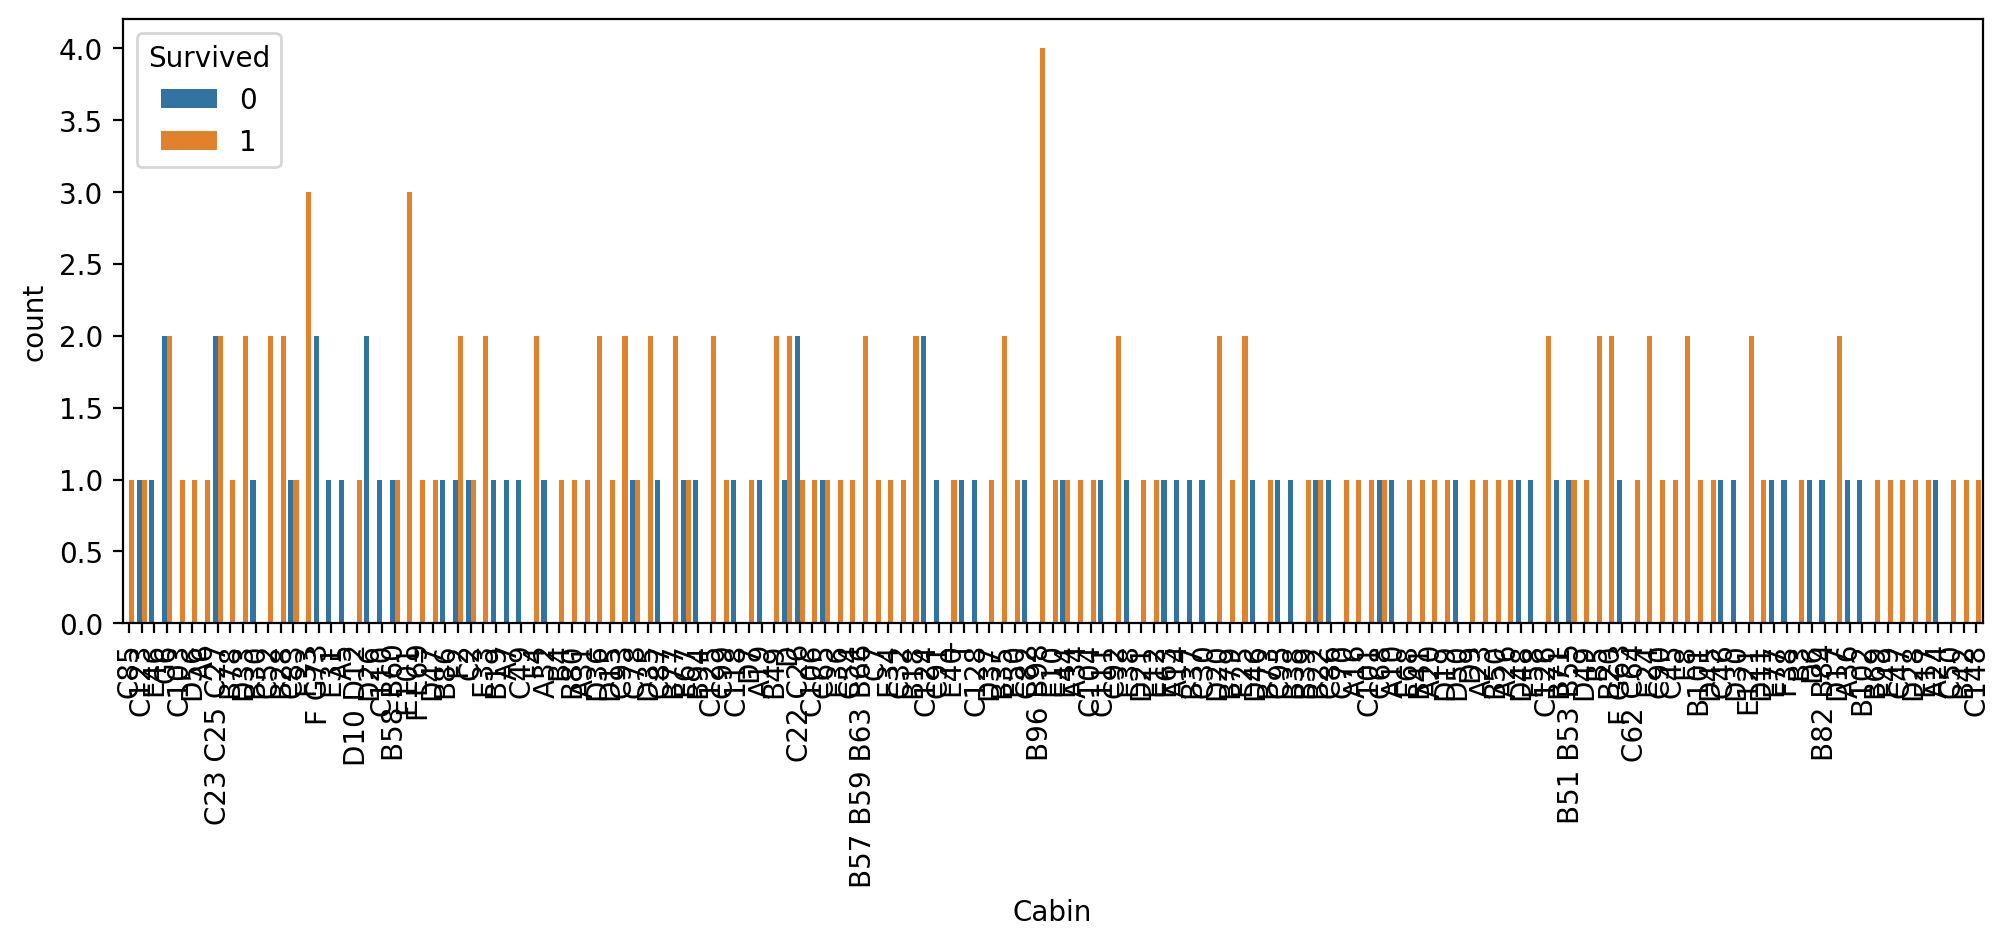

In [25]:
plt.figure(figsize=(12,4),dpi=200)
sns.countplot(data=train_data, x='Cabin', hue='Survived')
plt.xticks(rotation=90);

In [26]:
train_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

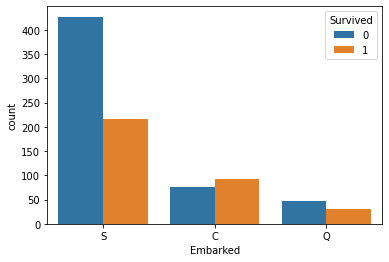

In [27]:
sns.countplot(data=train_data, x='Embarked', hue='Survived')

In [28]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
train_data[train_data['Age'].isna()].groupby('Pclass').count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,30,30,30,30,0,30,30,30,30,16,30
2,11,11,11,11,0,11,11,11,11,1,11
3,136,136,136,136,0,136,136,136,136,2,136


<AxesSubplot:xlabel='Age', ylabel='Count'>

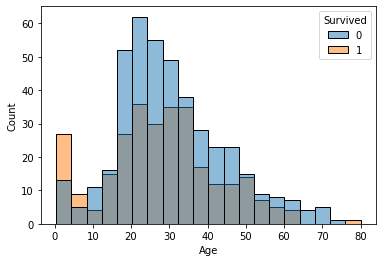

In [32]:
sns.histplot(data=train_data,x= 'Age',hue='Survived')

In [34]:
train_data.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [33]:
train_data.groupby(['Survived', 'Pclass','Sex']).mean()

PassengerId        Age     SibSp     Parch        Fare
Survived Pclass Sex                                                           
0        1      female   325.000000  25.666667  0.666667  1.333333  110.604167
                male     413.623377  44.581967  0.272727  0.259740   62.894910
         2      female   423.500000  36.000000  0.500000  0.166667   18.250000
                male     454.010989  33.369048  0.307692  0.142857   19.488965
         3      female   440.375000  23.818182  1.291667  1.097222   19.773093
                male     456.750000  27.255814  0.523333  0.213333   12.204469
1        1      female   473.967033  34.939024  0.549451  0.428571  105.978159
                male     527.777778  36.248000  0.377778  0.311111   74.637320
         2      female   444.785714  28.080882  0.485714  0.642857   22.288989
                male     415.588235  16.022000  0.529412  0.647059   21.095100
         3      female   359.083333  19.329787  0.500000  0.500000   12.464526
                male     447.638298  22.274211  0.340426  0.297872   15.579696

In [35]:
train_data['Age']=train_data.groupby(['Survived', 'Pclass','Sex'])['Age'].transform(lambda value: value.fillna(value.mean()))
test_data['Age'] =test_data.groupby(['Pclass','Sex'])['Age'].transform(lambda value:value.fillna(value.mean()))

In [36]:
test_data['Fare']= test_data['Fare'].fillna(test_data['Fare'].mean())

In [37]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [38]:
for df in All_data: 
    df.drop('Cabin',axis=1,inplace=True)

In [39]:
train_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [40]:
train_data[train_data['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


<AxesSubplot:xlabel='Embarked', ylabel='count'>

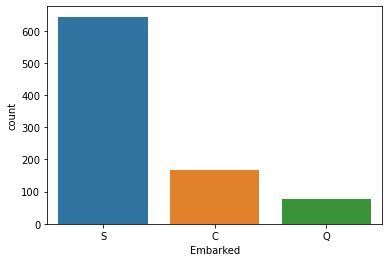

In [41]:
sns.countplot(data=train_data, x= 'Embarked')

In [42]:
for df in All_data: 
    df['Embarked'].fillna('S')

In [43]:
train_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [44]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [45]:
result_data = pd.DataFrame(test_data['PassengerId'])
for df in All_data:
    df = df.drop(['PassengerId','Name'],axis=1,inplace =True)


In [46]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [47]:
for df in All_data:
    df.drop('Ticket',axis=1,inplace=True)
X = train_data.drop('Survived',axis=1)

y = train_data['Survived']

In [48]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [49]:
X_dummies = pd.get_dummies(X,drop_first=True)

In [50]:
X_dummies.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [51]:
test_data.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [52]:
final_test = pd.get_dummies(test_data, drop_first=True)

# Modeling 

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.15, random_state=101)

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)

In [57]:
scaled_X_test = scaler.transform(X_test)

In [58]:
final_test = scaler.transform(final_test)

## Random Forest Model

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
# 
from sklearn.metrics import accuracy_score
train_errors = []
test_errors = []
for n in range(1,200): 
    rf_model = RandomForestClassifier(n_estimators=n,max_depth=4,random_state=101)
    rf_model.fit(scaled_X_train,y_train,)
    train_error = 1 - accuracy_score(y_train, rf_model.predict(scaled_X_train))
    test_error = 1 - accuracy_score(y_test,rf_model.predict(scaled_X_test))
    train_errors.append(train_error)
    test_errors.append(test_error)
    print(n,end=" ")
    
    

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 

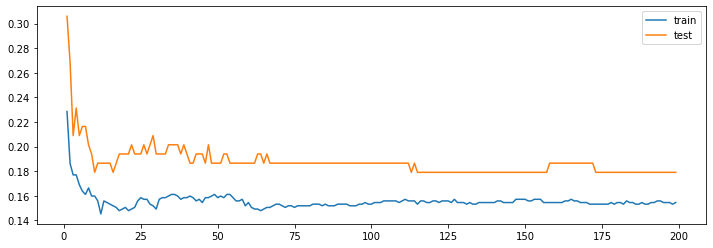

In [62]:
plt.figure(figsize=(12,4))
plt.plot(range(1,200), train_errors,label='train')
plt.plot(range(1,200),test_errors, label='test')
plt.legend()

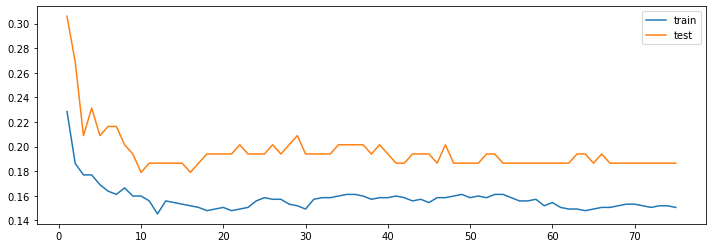

In [63]:
plt.figure(figsize=(12,4))
plt.plot(range(1,76), train_errors[:75],label='train')
plt.plot(range(1,76),test_errors[:75], label='test')
plt.legend()

In [64]:
np.argmin(train_errors)

11

In [65]:
np.argmin(test_errors)

9

In [66]:

rf_model = RandomForestClassifier(n_estimators=9,random_state=101,max_depth=4)

In [67]:
rf_model.fit(scaled_X_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=9, random_state=101)

In [68]:
from sklearn.metrics import classification_report

In [69]:
print(classification_report(y_test,rf_model.predict(scaled_X_test)))

              precision    recall  f1-score   support

           0       0.74      0.96      0.84        70
           1       0.93      0.64      0.76        64

    accuracy                           0.81       134
   macro avg       0.84      0.80      0.80       134
weighted avg       0.83      0.81      0.80       134



In [71]:
result_data['Survived']=rf_model.predict(final_test)
result_data.to_csv('Result_rf_nest9_depth4.csv',index=None)

# Debuging

In [72]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.339313,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.370271,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,27.255814,0.000000,0.000000,14.454200
75%,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [73]:
train_data.describe(include=['O'])

,Sex,Embarked
count,891,889
unique,2,3
top,male,S
freq,577,644


In [74]:
train_data.groupby('Pclass').mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.520475,0.416667,0.356481,84.154687
2,0.472826,29.840321,0.402174,0.380435,20.662183
3,0.242363,25.112598,0.615071,0.393075,13.675550


In [75]:
train_data.groupby('Sex').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,0.742038,2.159236,27.212633,0.694268,0.649682,44.479818
male,0.188908,2.389948,30.496639,0.429809,0.235702,25.523893


In [76]:
train_data.groupby('SibSp').mean().sort_values(by='Survived',ascending=False)

,Survived,Pclass,Age,Parch,Fare
SibSp,,,,,
1,0.535885,2.057416,29.595273,0.655502,44.147370
2,0.464286,2.357143,22.655708,0.642857,51.753718
0,0.345395,2.351974,30.752249,0.185855,25.692028
3,0.250000,2.562500,16.606897,1.312500,68.908862
4,0.166667,3.000000,7.055556,1.500000,31.855556
5,0.000000,3.000000,10.200000,2.000000,46.900000
8,0.000000,3.000000,25.782543,2.000000,69.550000


In [77]:
train_data.groupby('Parch').mean().sort_values(by='Survived',ascending=False)

,Survived,Pclass,Age,SibSp,Fare
Parch,,,,,
3,0.600000,2.600000,33.200000,1.000000,25.951660
1,0.550847,2.203390,24.440234,1.084746,46.778180
2,0.500000,2.275000,18.365849,2.062500,64.337604
0,0.343658,2.321534,31.275977,0.237463,25.586774
5,0.200000,3.000000,39.200000,0.600000,32.550000
4,0.000000,2.500000,44.500000,0.750000,84.968750
6,0.000000,3.000000,43.000000,1.000000,46.900000


# Discussion on Age

<AxesSubplot:xlabel='Age', ylabel='Count'>

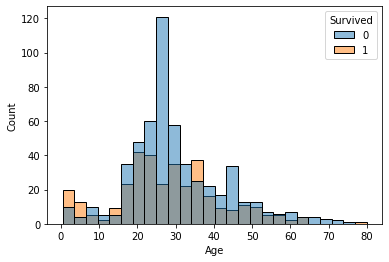

In [78]:
sns.histplot(data=train_data,x= 'Age',hue='Survived')

<AxesSubplot:xlabel='Age', ylabel='Count'>

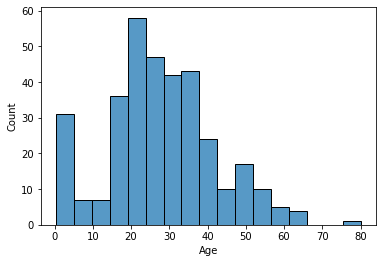

In [79]:
sns.histplot(data =train_data[train_data['Survived']==1],x = 'Age')

<AxesSubplot:xlabel='Age', ylabel='Count'>

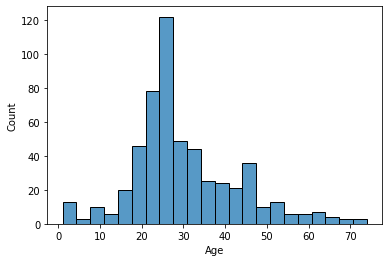

In [80]:
sns.histplot(data =train_data[train_data['Survived']==0],x = 'Age')

<AxesSubplot:xlabel='Age', ylabel='Count'>

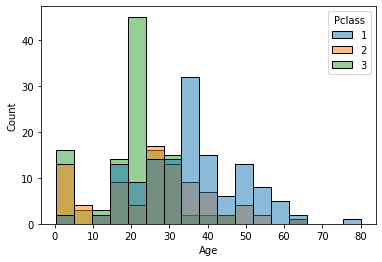

In [81]:
sns.histplot(data =train_data[train_data['Survived']==1],x = 'Age',hue='Pclass',palette='tab10')

<AxesSubplot:xlabel='Age', ylabel='Count'>

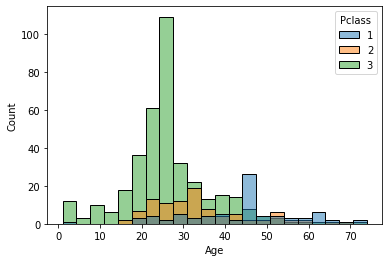

In [82]:
sns.histplot(data =train_data[train_data['Survived']==0],x = 'Age',hue='Pclass',palette='tab10')

# Before dropping name: 

We want to analyze name title and the relationship between title and survived. If we find a significant relationship, We can made a new feature based on title. 
In the first step, we extract the title from name and add a title column. Then we determine the corelation between title and survived. 

In [83]:
train2_data = pd.read_csv('train.csv') 
train2_data['title'] = train2_data['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)

In [84]:
test2_data = pd.read_csv('test.csv') 
test_data['title']= test2_data['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)

In [85]:
train_data['title']= train2_data['title']

In [86]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [87]:
train_data.groupby(['title','Sex']).count()['Survived']

title     Sex   
Capt      male        1
Col       male        2
Countess  female      1
Don       male        1
Dr        female      1
          male        6
Jonkheer  male        1
Lady      female      1
Major     male        2
Master    male       40
Miss      female    182
Mlle      female      2
Mme       female      1
Mr        male      517
Mrs       female    125
Ms        female      1
Rev       male        6
Sir       male        1
Name: Survived, dtype: int64

In [88]:
# Reduce the title 
train_data['title'].replace(['Lady', 'Countess','Capt', 'Col',\
 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare',inplace=True)
train_data['title'].replace('Mlle', 'Miss', inplace=True)
train_data['title'].replace('Ms', 'Miss', inplace=True)
train_data['title'].replace('Mme', 'Mrs', inplace=True)

In [89]:
# Reduce the title 
test_data['title'].replace(['Lady', 'Countess','Capt', 'Col',\
 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare',inplace=True)
test_data['title'].replace('Mlle', 'Miss', inplace=True)
test_data['title'].replace('Ms', 'Miss', inplace=True)
test_data['title'].replace('Mme', 'Mrs', inplace=True)

In [90]:
train_data.groupby('title').mean()['Survived']

title
Master    0.575000
Miss      0.702703
Mr        0.156673
Mrs       0.793651
Rare      0.347826
Name: Survived, dtype: float64

# Converting Age feature into categorical 

In [91]:
train_data['Age_cat'] = pd.cut(train_data['Age'],5)
train_data.groupby('Age_cat').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age_cat,,,,,,
"(0.34, 16.336]",0.558824,2.598039,8.163863,1.539216,1.117647,31.232845
"(16.336, 32.252]",0.338843,2.578512,24.663280,0.433884,0.237603,24.466381
"(32.252, 48.168]",0.400000,1.871111,39.198160,0.333333,0.395556,43.893017
"(48.168, 64.084]",0.434783,1.507246,54.847826,0.333333,0.289855,50.327235
"(64.084, 80.0]",0.090909,1.727273,69.772727,0.090909,0.181818,28.905691


In [92]:
test_data['Age_cat'] = pd.cut(train_data['Age'],5)
test_data.groupby('Age_cat').mean()

,Pclass,Age,SibSp,Parch,Fare
Age_cat,,,,,
"(0.34, 16.336]",2.196078,29.385701,0.392157,0.215686,42.107190
"(16.336, 32.252]",2.281385,29.235435,0.402597,0.445887,34.687933
"(32.252, 48.168]",2.247619,29.971413,0.561905,0.361905,37.493055
"(48.168, 64.084]",2.307692,27.777774,0.500000,0.384615,25.462907
"(64.084, 80.0]",2.400000,35.507836,0.400000,0.400000,26.595840


In [93]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Sex       891 non-null    object  
 3   Age       891 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Embarked  889 non-null    object  
 8   title     891 non-null    object  
 9   Age_cat   891 non-null    category
dtypes: category(1), float64(2), int64(4), object(3)
memory usage: 63.9+ KB


In [94]:
train_data['Family_size'] = train_data['SibSp']+train_data['Parch'] + 1
train_data.groupby('Family_size').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Family_size,,,,,,
1,0.303538,2.400372,31.330004,0.000000,0.000000,21.242689
2,0.552795,1.919255,30.822354,0.763975,0.236025,49.894129
3,0.578431,2.225490,25.696413,0.872549,1.127451,39.692482
4,0.724138,2.068966,18.775655,1.344828,1.655172,54.864510
5,0.200000,2.666667,21.847357,2.133333,1.866667,58.094453
6,0.136364,2.590909,18.409091,2.818182,2.181818,73.722727
7,0.333333,3.000000,15.166667,3.250000,2.750000,29.366667
8,0.000000,3.000000,15.666667,4.333333,2.666667,46.900000
11,0.000000,3.000000,25.782543,8.000000,2.000000,69.550000


In [95]:
test_data['Family_size'] = train_data['SibSp']+train_data['Parch']+1
test_data.groupby('Family_size').mean()

,Pclass,Age,SibSp,Parch,Fare
Family_size,,,,,
1,2.269710,29.355825,0.377593,0.385892,34.434534
2,2.211765,30.075905,0.447059,0.352941,37.177355
3,2.306122,29.133391,0.673469,0.530612,37.350255
4,2.375000,29.953190,0.625000,0.125000,25.135425
5,2.222222,28.666667,0.444444,0.666667,51.101389
6,2.416667,27.466117,1.000000,0.333333,20.648267
7,2.142857,33.789301,0.571429,0.000000,23.410129
8,2.333333,27.000000,0.000000,0.000000,92.681933
11,2.250000,23.832500,0.000000,1.000000,63.128125


In [100]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,Age_cat,Family_size
0,0,3,male,22.0,1,0,7.2500,S,Mr,"(16.336, 32.252]",2
1,1,1,female,38.0,1,0,71.2833,C,Mrs,"(32.252, 48.168]",2
2,1,3,female,26.0,0,0,7.9250,S,Miss,"(16.336, 32.252]",1
3,1,1,female,35.0,1,0,53.1000,S,Mrs,"(32.252, 48.168]",2
4,0,3,male,35.0,0,0,8.0500,S,Mr,"(32.252, 48.168]",1


In [101]:
X = train_data.drop(['Survived','Age','Parch','Fare','SibSp'],axis=1)

In [102]:
X_final_test = test_data.drop(['Age','Parch','Fare','SibSp'],axis=1)

In [103]:
X_final_test= pd.get_dummies(X_final_test,drop_first=True)

In [105]:
X.head()


,Pclass,Family_size,Sex_male,Embarked_Q,Embarked_S,title_Miss,title_Mr,title_Mrs,title_Rare,"Age_cat_(16.336, 32.252]","Age_cat_(32.252, 48.168]","Age_cat_(48.168, 64.084]","Age_cat_(64.084, 80.0]"
0,3,2,1,0,1,0,1,0,0,1,0,0,0
1,1,2,0,0,0,0,0,1,0,0,1,0,0
2,3,1,0,0,1,1,0,0,0,1,0,0,0
3,1,2,0,0,1,0,0,1,0,0,1,0,0
4,3,1,1,0,1,0,1,0,0,0,1,0,0


In [106]:
X = pd.get_dummies(X,drop_first=True)


In [107]:
y = train_data['Survived']

In [108]:
X.head()

,Pclass,Family_size,Sex_male,Embarked_Q,Embarked_S,title_Miss,title_Mr,title_Mrs,title_Rare,"Age_cat_(16.336, 32.252]","Age_cat_(32.252, 48.168]","Age_cat_(48.168, 64.084]","Age_cat_(64.084, 80.0]"
0,3,2,1,0,1,0,1,0,0,1,0,0,0
1,1,2,0,0,0,0,0,1,0,0,1,0,0
2,3,1,0,0,1,1,0,0,0,1,0,0,0
3,1,2,0,0,1,0,0,1,0,0,1,0,0
4,3,1,1,0,1,0,1,0,0,0,1,0,0


In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [111]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
x_test_sc = scaler.transform(X_test)

In [112]:
X_final_test

,Pclass,Family_size,Sex_male,Embarked_Q,Embarked_S,title_Miss,title_Mr,title_Mrs,title_Rare,"Age_cat_(16.336, 32.252]","Age_cat_(32.252, 48.168]","Age_cat_(48.168, 64.084]","Age_cat_(64.084, 80.0]"
0,3,2,1,1,0,0,1,0,0,1,0,0,0
1,3,2,0,0,1,0,0,1,0,0,1,0,0
2,2,1,1,1,0,0,1,0,0,1,0,0,0
3,3,2,1,0,1,0,1,0,0,0,1,0,0
4,3,1,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,1,1,0,1,0,1,0,0,0,1,0,0
414,1,1,0,0,0,0,0,0,1,0,1,0,0
415,3,1,1,0,1,0,1,0,0,1,0,0,0
416,3,3,1,0,1,0,1,0,0,0,1,0,0


In [113]:
X_train

,Pclass,Family_size,Sex_male,Embarked_Q,Embarked_S,title_Miss,title_Mr,title_Mrs,title_Rare,"Age_cat_(16.336, 32.252]","Age_cat_(32.252, 48.168]","Age_cat_(48.168, 64.084]","Age_cat_(64.084, 80.0]"
403,3,2,1,0,1,0,1,0,0,1,0,0,0
227,3,1,1,0,1,0,1,0,0,1,0,0,0
33,2,1,1,0,1,0,1,0,0,0,0,0,1
699,3,1,1,0,1,0,1,0,0,0,1,0,0
384,3,1,1,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,3,1,1,0,1,0,1,0,0,1,0,0,0
838,3,1,1,0,1,0,1,0,0,1,0,0,0
337,1,1,0,0,0,1,0,0,0,0,1,0,0
523,1,2,0,0,0,0,0,1,0,0,1,0,0


In [114]:
X_final_test = scaler.transform(X_final_test)

# Creating Modeling

In [115]:
# logestic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lg_model = LogisticRegression(random_state=101)
lg_model.fit(X_train_sc,y_train)
y_pred = lg_model.predict(x_test_sc)
#lg_model.score(y_test,y_pred)
accuracy_score(y_test,y_pred)


0.8059701492537313

In [118]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score
print(classification_report(y_test,lg_model.predict(x_test_sc)))

              precision    recall  f1-score   support

           0       0.76      0.93      0.83        70
           1       0.90      0.67      0.77        64

    accuracy                           0.81       134
   macro avg       0.83      0.80      0.80       134
weighted avg       0.82      0.81      0.80       134



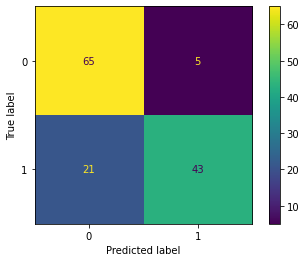

In [122]:
plot_confusion_matrix(lg_model,x_test_sc,y_test)

In [ ]:
result_data['Survived']=lg_model.predict(X_final_test)
result_data.to_csv('lg_model.csv',index=False)

In [123]:
# Support Vector Machine Classifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc_model = SVC(random_state=101)
svc_model.fit(X_train_sc,y_train)
y_pred = svc_model.predict(x_test_sc)
#lg_model.score(y_test,y_pred)
accuracy_score(y_test,y_pred)


0.8134328358208955

              precision    recall  f1-score   support

           0       0.74      0.99      0.85        70
           1       0.98      0.62      0.76        64

    accuracy                           0.81       134
   macro avg       0.86      0.81      0.80       134
weighted avg       0.85      0.81      0.81       134



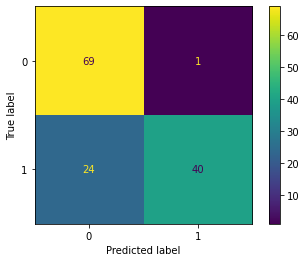

In [124]:
print(classification_report(y_test,svc_model.predict(x_test_sc)))
plot_confusion_matrix(svc_model,x_test_sc,y_test)

In [ ]:
result_data['Survived']=svc_model.predict(X_final_test)
result_data.to_csv('Result_scv.csv',index=False)

In [125]:
# linear Support Vector Machine
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
svc_model = LinearSVC(max_iter=2000,random_state=101)
svc_model.fit(X_train_sc,y_train)
y_pred = svc_model.predict(x_test_sc)
#lg_model.score(y_test,y_pred)
accuracy_score(y_test,y_pred)


0.8059701492537313

              precision    recall  f1-score   support

           0       0.76      0.91      0.83        70
           1       0.88      0.69      0.77        64

    accuracy                           0.81       134
   macro avg       0.82      0.80      0.80       134
weighted avg       0.82      0.81      0.80       134



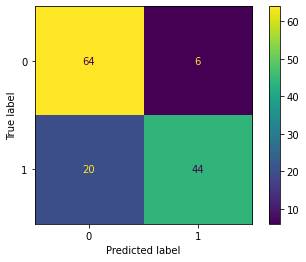

In [126]:
print(classification_report(y_test,svc_model.predict(x_test_sc)))
plot_confusion_matrix(svc_model,x_test_sc,y_test)

In [127]:
result_data['Survived']=svc_model.predict(X_final_test)
result_data.to_csv('Result_linearsvC.csv',index=False)

In [128]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt_model = DecisionTreeClassifier(max_depth=4,random_state=101)
dt_model.fit(X_train,y_train)
y_pred = dt_model.predict(X_test)
#lg_model.score(y_test,y_pred)
accuracy_score(y_test,y_pred)

0.7985074626865671

              precision    recall  f1-score   support

           0       0.74      0.79      0.76        70
           1       0.75      0.70      0.73        64

    accuracy                           0.75       134
   macro avg       0.75      0.74      0.74       134
weighted avg       0.75      0.75      0.75       134



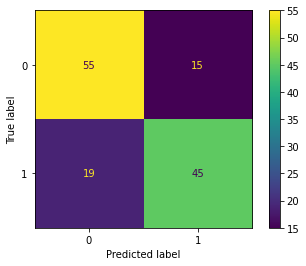

In [129]:
print(classification_report(y_test,dt_model.predict(x_test_sc)))
plot_confusion_matrix(dt_model,x_test_sc,y_test)

In [130]:
result_data['Survived']=dt_model.predict(X_final_test)
result_data.to_csv('Result_dt_maxdepth=4.csv',index=False)

In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_model = RandomForestClassifier(n_estimators=10,max_depth=5,random_state=101)
rf_model.fit(X_train_sc,y_train)
y_pred = rf_model.predict(x_test_sc)
#lg_model.score(y_test,y_pred)
accuracy_score(y_test,y_pred)

0.7910447761194029

              precision    recall  f1-score   support

           0       0.72      0.99      0.83        70
           1       0.97      0.58      0.73        64

    accuracy                           0.79       134
   macro avg       0.85      0.78      0.78       134
weighted avg       0.84      0.79      0.78       134



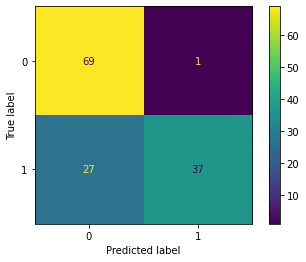

In [132]:
print(classification_report(y_test,rf_model.predict(x_test_sc)))
plot_confusion_matrix(rf_model,x_test_sc,y_test)

In [133]:
result_data['Survived']=rf_model.predict(X_final_test)
result_data.to_csv('Result_rf_est_10_maxdepth_5.csv',index=False)

In [134]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
ada_model = AdaBoostClassifier( n_estimators=500,random_state=101)
ada_model.fit(X_train_sc,y_train)
y_pred = ada_model.predict(x_test_sc)
#lg_model.score(y_test,y_pred)
accuracy_score(y_test,y_pred)

0.7985074626865671

              precision    recall  f1-score   support

           0       0.77      0.89      0.82        70
           1       0.85      0.70      0.77        64

    accuracy                           0.80       134
   macro avg       0.81      0.79      0.80       134
weighted avg       0.81      0.80      0.80       134



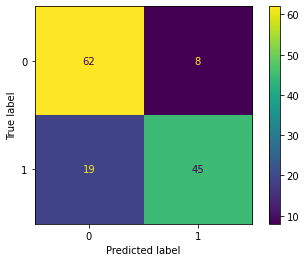

In [135]:
print(classification_report(y_test,ada_model.predict(x_test_sc)))
plot_confusion_matrix(ada_model,x_test_sc,y_test)

In [136]:
result_data['Survived']=ada_model.predict(X_final_test)
result_data.to_csv('Result_ada_est_500.csv',index=False)

In [137]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
gr_model = GradientBoostingClassifier(n_estimators=30,max_depth=2,random_state=101)
gr_model.fit(X_train_sc,y_train)
y_pred = gr_model.predict(x_test_sc)
#lg_model.score(y_test,y_pred)
accuracy_score(y_test,y_pred)

0.7835820895522388

              precision    recall  f1-score   support

           0       0.74      0.90      0.81        70
           1       0.86      0.66      0.74        64

    accuracy                           0.78       134
   macro avg       0.80      0.78      0.78       134
weighted avg       0.80      0.78      0.78       134



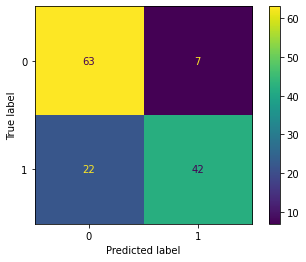

In [138]:
print(classification_report(y_test,gr_model.predict(x_test_sc)))
plot_confusion_matrix(gr_model,x_test_sc,y_test)

In [139]:
result_data['Survived']=gr_model.predict(X_final_test)
result_data.to_csv('Result_gr.csv',index=False)

In [140]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn_model = KNeighborsClassifier(n_neighbors=30)
knn_model.fit(X_train_sc,y_train)
y_pred = knn_model.predict(x_test_sc)
#lg_model.score(y_test,y_pred)
accuracy_score(y_test,y_pred)

0.7835820895522388

In [ ]:
print(classification_report(y_test,knn_model.predict(x_test_sc)))
plot_confusion_matrix(knn_model,x_test_sc,y_test)

In [ ]:
result_data['Survived']=knn_model.predict(X_final_test)
result_data.to_csv('Result_knn.csv',index=False)

In [ ]:
train2_data = pd.read_csv('train.csv') 
y_pred = rf_model.predict(scaled_X_test)
X_test['pred'] = y_pred
Result = pd.concat([X_test, train2_data], axis=1, join="inner")

In [ ]:
misclassified = Result[Result['pred']!=Result['Survived']]
misclassified = misclassified['pred']

In [ ]:
train2_data = pd.read_csv('train.csv') 
misclassified_origin = pd.concat([misclassified,train2_data],join='inner',axis=1)
misclassified_origin.groupby('Survived').count()

In [ ]:
misclassified_origin

In [ ]:
sns.histplot(data=misclassified_origin,x='Age',hue='Survived',bins=15)

In [ ]:
sns.histplot(data=misclassified_origin,x='Fare',hue='Survived',bins=15)

In [ ]:
sns.histplot(data=misclassified_origin,x='Embarked',hue='Survived',bins=15)

In [ ]:
misclassified_origin.groupby(['Survived','Pclass']).count()

In [ ]:
misclassified_origin.groupby(['Survived','SibSp','Parch']).count()

In [ ]:
misclassified_origin.groupby(['Survived','Cabin']).count()

In [ ]:
misclassified_origin.groupby(['Survived','Sex']).count()

In [ ]:
misclassified_origin.groupby(['Survived','SibSp','Pclass']).count()

In [ ]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score
print(classification_report(y_test,model.predict(scaled_X_test)))

In [ ]:
plot_confusion_matrix(model, scaled_X_test, y_test)

In [ ]:
accuracy_score(y_test,model.predict(scaled_X_test))

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model = XGBClassifier(use_label_encoder=False)
model.fit(scaled_X_train, y_train)

In [ ]:

from sklearn.model_selection import cross_val_score
cross_val_score(XGBClassifier(),scaled_X_train, y_train)

In [ ]:
test_data[['PassengerId','Survived']].to_csv('try1_svc_model.csv',index=False)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_model = SVC()

In [ ]:
svc_model.fit(scaled_X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [ ]:
print(classification_report(y_test,svc_model.predict(scaled_X_test)))

In [ ]:
plot_confusion_matrix(svc_model, scaled_X_test, y_test)

In [ ]:
accuracy_score(y_test, svc_model.predict(scaled_X_test))

In [ ]:
test_data.head()

In [ ]:
test_data = test_data.drop(['PassengerId','Name','Ticket'], axis=1)

In [ ]:
test_data.head()

In [ ]:
X_train

In [ ]:
test_data.isna().sum()

In [ ]:
test_data=test_data.drop('Cabin',axis=1)

In [ ]:
test_data[test_data['Fare'].isna()]

In [ ]:
test_data.groupby(['Pclass','Sex']).mean()

In [ ]:
test_data['Fare']=test_data['Fare'].fillna(11.826350)

In [ ]:
test_data.isna().sum()

In [ ]:
test_data['Age']=test_data.groupby(['Pclass','Sex'])['Age'].transform(lambda value: value.fillna(value.mean()))


In [ ]:
test_data.isna().sum()

In [ ]:
test_data = pd.get_dummies(test_data, drop_first=True)
scaled_test_data = scaler.transform(test_data)

In [ ]:
test_data['Survived']=model.predict(scaled_test_data)

In [ ]:
test_data[['PassengerId','Survived']].to_csv('XGB_model.csv',index=False)

In [ ]:
plot_confusion_matrix(rf_model,scaled_X_test,y_test)

In [ ]:
accuracy_score(y_test, rf_model.predict(scaled_X_test))

In [ ]:
submit_data = test_data['Survived']=rf_model.predict(scaled_test_data)

In [ ]:
submit_data